<a href="https://colab.research.google.com/github/DiyaSReddy/EDA/blob/main/EDA_mini_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving world_population.csv to world_population.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
file_path = '/content/world_population.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

Renaming columns for ease

In [ ]:
print(df.columns)

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (kmÂ²)',
       'Density (per kmÂ²)', 'Growth Rate', 'World Population Percentage'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
column_mapping = {
    'country/territory': 'country',
    '2022_population': 'population',
}
df.rename(columns=column_mapping, inplace=True)

1. Top 10 most populated countries

<ipython-input-14-dafec4156268>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries['country'], x=top_countries['population'], palette='coolwarm')


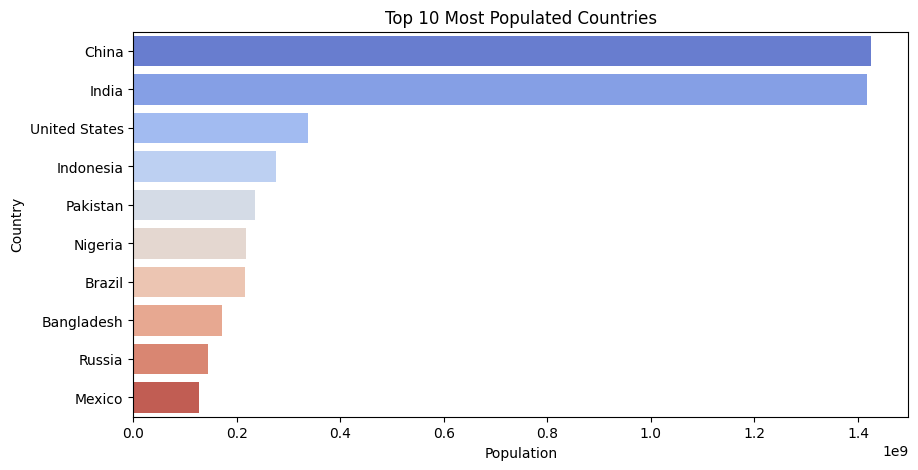

In [ ]:
top_countries = df.sort_values(by='population', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_countries['country'], x=top_countries['population'], palette='coolwarm')
plt.title('Top 10 Most Populated Countries')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

2. Gloabal population change over time

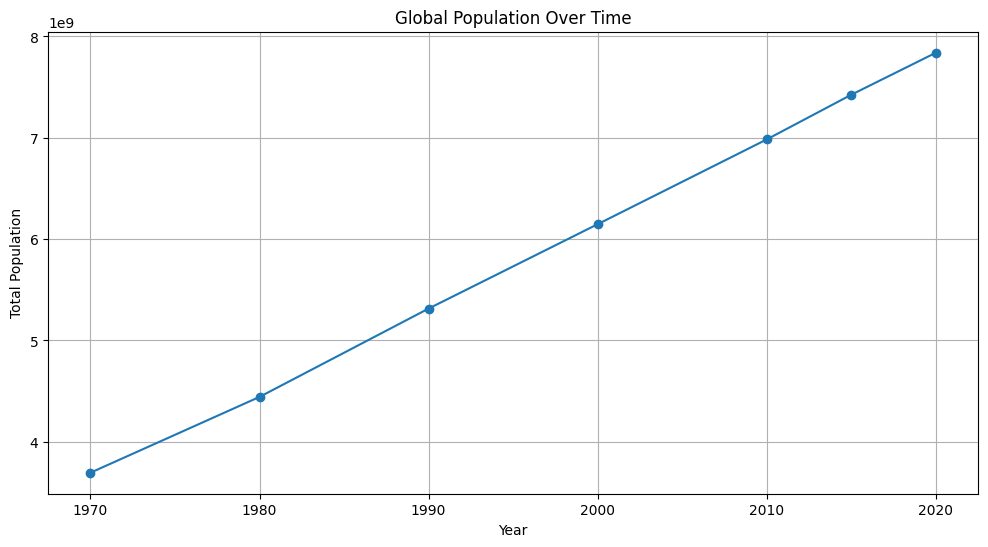

In [ ]:
year_columns = [col for col in df.columns if col.endswith('_population') and col != 'population']
year_population_df = df.melt(id_vars=['country'], value_vars=year_columns,
                             var_name='year', value_name='yearly_population')
year_population_df['year'] = year_population_df['year'].str.extract(r'(\d{4})').astype(int)
global_population = year_population_df.groupby('year')['yearly_population'].sum()
plt.figure(figsize=(10, 5))
global_population.plot(marker='o', linestyle='-')
plt.title('Global Population Over Time')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid()
plt.show()

3. Relationship Between Birth Rate and Death Rate. Columns not available in dataset.

4. Population Distribution Across Continents

<ipython-input-24-1989dfbd030e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=continents.index, x=continents.values, palette='coolwarm')


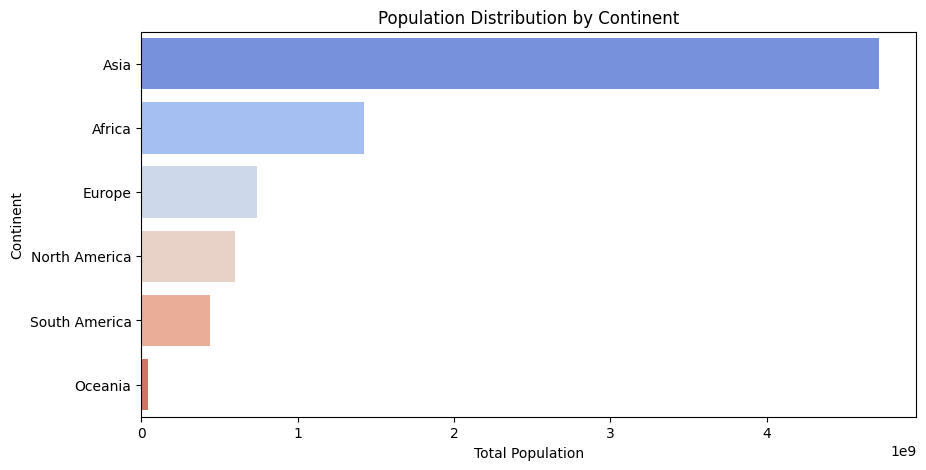

In [ ]:
continents = df.groupby('continent')['population'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(y=continents.index, x=continents.values, palette='coolwarm')
plt.title('Population Distribution by Continent')
plt.xlabel('Total Population')
plt.ylabel('Continent')
plt.show()